In [18]:
######### MODULES ########
import re
import numpy as np
from matplotlib import pyplot as plt, patches
import celia_functions as cf
plt.rcParams.update({'font.size':14, "xtick.direction":"in", "ytick.direction":"in"})

In [19]:
shotsheet = cf.read_metadata(["SHOT #","Target X","Target Z","TARGET NUMBER","Laser Energy (before comp) [J]"])

for key in shotsheet.keys():
    shotsheet[key] = [np.nan if re.search('[^\d.]', str(value)) else float(value) for value in shotsheet[key]] # Filter out all numberic characters. Numeric characters being: `0123456789.`

row_has_data = ~np.all(np.isnan(cf.transform_list(shotsheet.values())), axis = 1)
shotsheet = {key: [cell for cell, cell_has_data in cf.transform_list((column, row_has_data)) if cell_has_data] for key, column in shotsheet.items()} # Filter out any rows that don't have any entries. (all nan rows)

shotsheet["SHOT #"] = [int(shot) for shot in shotsheet["SHOT #"]] #make all shots into intergers. Will fail if there is a nan value.



In [20]:
xray = {"xray": [66,67,69,86,90,105,106]}

xray_shots = {ch: [shot for t in target for shot, s in enumerate(shotsheet["SHOT #"]) if shotsheet["TARGET NUMBER"][s] == t] for ch, target in xray.items()} #find the respective shots for these targets

photos = cf.read_diagnostic_data(xray_shots)

Found 45 files:
   2024 janvier 30 17_46_35 SHOT128.tif
   2024 janvier 30 17_54_28 SHOT129.tif
   2024 janvier 30 17_55_36 SHOT130.tif
   2024 janvier 30 17_59_03 SHOT131.tif
   2024 janvier 30 18_02_38 SHOT132.tif
   2024 janvier 30 18_06_45 SHOT133.tif
   2024 janvier 30 18_17_00 SHOT134.tif
   2024 janvier 30 18_17_32 SHOT135.tif
   2024 janvier 30 17_13_56 SHOT122.tif
   2024 janvier 30 17_21_56 SHOT123.tif
   2024 janvier 30 17_25_54 SHOT124.tif
   2024 janvier 30 17_31_13 SHOT125.tif
   2024 janvier 30 17_38_00 SHOT126.tif
   2024 janvier 30 17_38_26 SHOT127.tif
   2024 janvier 30 16_42_45 SHOT114.tif
   2024 janvier 30 16_48_18 SHOT115.tif
   2024 janvier 30 16_53_04 SHOT116.tif
   2024 janvier 30 16_55_29 SHOT117.tif
   2024 janvier 30 16_59_30 SHOT118.tif
   2024 janvier 30 17_03_14 SHOT119.tif
   2024 janvier 30 17_07_03 SHOT120.tif
   2024 janvier 30 17_10_32 SHOT121.tif
   2024 janvier 31 18_17_03 SHOT147.tif
   2024 janvier 31 18_24_54 SHOT148.tif
   2024 janvier 31 18_29

In [21]:
example_photo = photos["xray"][6]
example_filtered = cf.dead_pixel_filter(example_photo, dead_pixels=1)

cropping_mask = np.full_like(example_filtered, False, dtype= bool)
cropping_mask[740:800,720:780] = True

example_cropped = example_filtered[747:793,726:775]

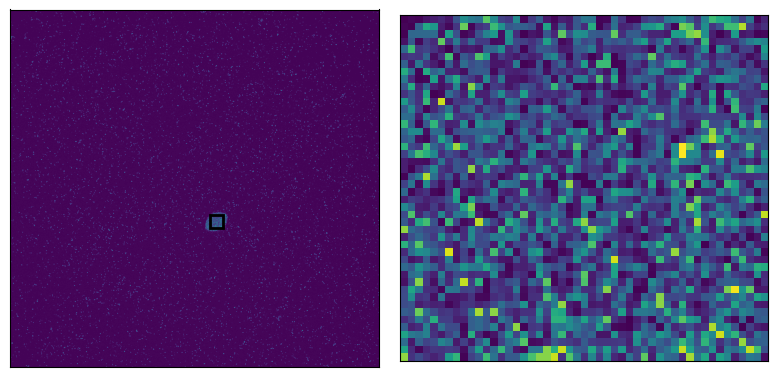

In [22]:
fig, axs = plt.subplots(1,2, figsize= (8,4))
axs = cf.flatten_list(axs)

axs[0].imshow(example_filtered)
rect = patches.Rectangle((726, 747), 49, 46, linewidth=2, edgecolor='k', facecolor='none')
axs[0].add_patch(rect)
axs[1].imshow(example_cropped)

[ax.set(xticks= [], yticks= []) for ax in axs]
plt.tight_layout()
plt.show()

In [23]:
example_signal = np.median(example_photo[cropping_mask])
example_noise = np.median(example_photo[~cropping_mask])

print(example_signal - example_noise)

632.5
